# Classification example of Slic on unseen data from Hinode/SOT

This notebook acts a primer on how to use Slic to prep solar image data directly from fits files and classify them. In this example we use data from 2011/10/08 from Hinode/SOT. The images used for classification will be images of a sunspot in Fe I &lambda;5576&#8491;.

Packages needed to run this notebook are:

* `PyTorch`
* `numpy`
* `maptlotlib`
* `scitkit-image`
* `astropy`
* (optionally) `palettable`

In [1]:
%matplotlib notebook
%config InlineBackend.figure_format = "retina"

import numpy as np
import matplotlib.pyplot as plt
from palettable.cmocean.sequential import Solar_20 #optional import comment out if you don't have palettable
import html, os, warnings
from astropy.io.fits import getdata
from skimage.transform import resize
from utils import *
from tqdm import tqdm_notebook
from IPython.core.display import display,HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
angstrom = html.unescape("&#8491;")

model_pth = "sol_class_4.pth"
dev = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #check for a CUDA device
sol_cm = Solar_20.mpl_colormap
warnings.filterwarnings("ignore",append=True)

The first course of action is to load in the data and to prep it.

In [4]:
sot_list = sorted(["example_data/"+x for x in os.listdir("example_data/")])
new_im_list = []
for i, image in tqdm_notebook(enumerate(sot_list)):
    tmp = getdata(image).astype(np.float64)
    tmp = resize(tmp,(256,256),anti_aliasing=True)
    tmp = tmp.reshape(1,256,256)
    new_im_list.append(tmp)
    
new_im_arr = np.array(new_im_list)

Now that the data has been loaded in to a `numpy.ndarray` we can classify the images easily using the `solar_classification` function.

In [5]:
ans_dict, ans_hist_dict = solar_classification(weights=model_pth,data=new_im_arr)

Classifying images: 18it [00:00, 185.41it/s]


In [6]:
ans_dict #dictionary which shows where each image was classified with the number corresponding to the file in the list

{'filaments': array([3], dtype=int16),
 'flares': array([], dtype=int16),
 'prominences': array([], dtype=int16),
 'quiet': array([], dtype=int16),
 'sunspots': array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
       dtype=int16)}

In [7]:
ans_hist_dict #dictionary containing the histograms

{'filaments': array([[5.75051188e-01, 3.14363319e-06, 2.22358969e-03, 3.64006730e-04,
         4.22358006e-01]]),
 'flares': array([], shape=(0, 5), dtype=float64),
 'prominences': array([], shape=(0, 5), dtype=float64),
 'quiet': array([], shape=(0, 5), dtype=float64),
 'sunspots': array([[2.82748998e-03, 1.65840938e-10, 1.03761465e-06, 3.88634476e-08,
         9.97171402e-01],
        [7.86252692e-03, 1.99980144e-09, 6.97764199e-06, 4.77230685e-07,
         9.92130041e-01],
        [1.31280556e-01, 2.46167900e-07, 1.97558940e-04, 2.98460836e-05,
         8.68491769e-01],
        [4.24570292e-02, 1.93054277e-07, 1.27904845e-04, 4.32288743e-06,
         9.57410514e-01],
        [1.53420988e-04, 2.47421111e-10, 1.74375984e-07, 1.12688148e-09,
         9.99846399e-01],
        [8.24290910e-05, 4.82567389e-11, 9.18223009e-08, 5.66923175e-10,
         9.99917507e-01],
        [1.58820156e-04, 5.19181642e-11, 1.85506892e-07, 1.42293222e-09,
         9.99840975e-01],
        [2.82191031e-04,

The images have now been classified with the `ans_dict` dictionary object containing entries for each of the five feature classes we have and the indices of the images in an ordered list sorted to match the feature they were assigned.

`ans_hist_dict` dictionary contains the probability histograms of the image belonging to each class based on the output of the network being passed through the softmax function

$$ p (x_{i}) = \frac{\exp x_{i}}{\sum_{k} \exp x_{k}} $$

where $x_{i}$ is the output of the network for the ith feature.

We can plot each image and its probability distribution using the `plot_image` and `plot_hist` functions imported from `utils.py`.

The `plot_dict` and `hist_dict` objects can have their entries modified to change the plots.

<IPython.core.display.Javascript object>


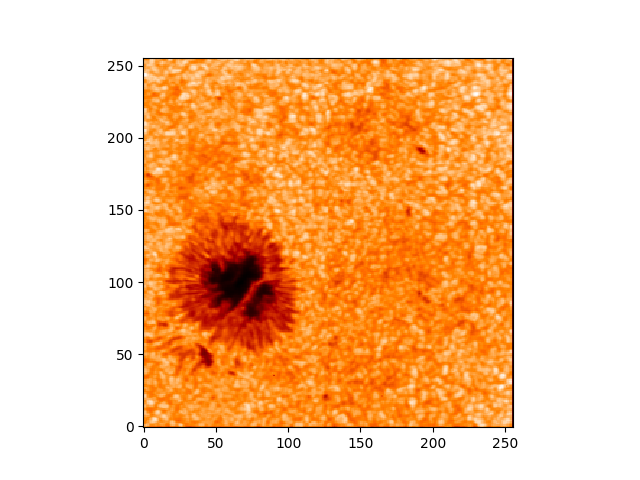

<IPython.core.display.Javascript object>


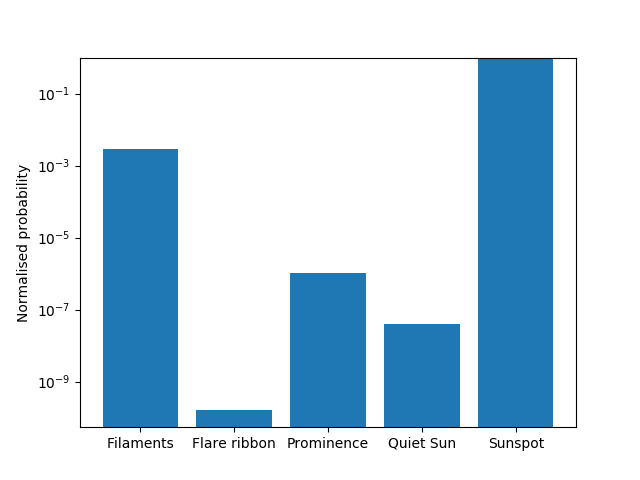

In [10]:
plot_dict = {
    "data" : new_im_arr,
    "feature_dict" : ans_dict,
    "feature" : "sunspots",
    "idx" : 0,
    "cmap" : "hinodesotintensity"
}
hist_dict = {
    "hist_dict" : ans_hist_dict,
    "feature" : "sunspots",
    "idx" : 0
}
plt.figure()
plot_image(**plot_dict)
plt.figure()
plot_hist(**hist_dict)